In [175]:
import os
import pandas as pd
import matplotlib.pyplot as plt

---

## Merge datasets

In [173]:
df = pd.DataFrame()

folder = "/content/data"

files = [file for file in os.listdir(folder)]

for file in files:
  data = pd.read_csv(folder + "/" + file)
  df = pd.concat([df, data])

df.head()

FileNotFoundError: ignored

In [ ]:
df.to_csv("sales.csv", index=False)

---

In [201]:
df = pd.read_csv("/content/sales.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
560545,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
560546,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
560547,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
560548,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [202]:
df = df.drop_duplicates()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
186846,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
186847,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
186848,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


## Data Cleaning

In [203]:
df = df.dropna(how="all")

In [204]:
df["Month"] = df["Order Date"].str[0:2]

<ipython-input-204-234d60889272>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Order Date"].str[0:2]


In [205]:
df = df[df["Month"] != "Or"]

In [206]:
df["Month"] = df["Month"].astype("int32")

In [207]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [208]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [209]:
df["City State"] = df["Purchase Address"].apply(lambda x: x.split(", ")[1]) + ", " + df["Purchase Address"].apply(lambda x: x.split(", ")[2][:2])

In [210]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [211]:
df["Order Hour"] = df["Order Date"].dt.hour

In [212]:
df["Order Minute"] = df["Order Date"].dt.minute

In [213]:
df["Group"] = df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))

In [214]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City State,Order Hour,Order Minute,Group
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,"New York City, NY",17,14,Wired Headphones
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,"Dallas, TX",14,43,AA Batteries (4-pack)
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,"New York City, NY",11,36,27in FHD Monitor
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,"Dallas, TX",20,40,Wired Headphones
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,"Seattle, WA",22,55,AAA Batteries (4-pack)


## Data Analysis

### By Month

In [215]:
sum_per_month = df.groupby("Month").sum()
sum_per_month

<ipython-input-215-31a5301f7d6c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_per_month = df.groupby("Month").sum()


,Quantity Ordered,Price Each,Sales,Order Hour,Order Minute
Month,,,,,
1,10893,1810924.81,1821413.16,139339,282230
2,13431,2186940.38,2200078.08,172392,354307
3,16979,2789084.64,2804973.35,218622,446783
4,20536,3366218.76,3389217.98,261916,543611
5,18653,3133134.61,3150616.23,238580,487579
6,15234,2560503.50,2576280.15,195223,401839
7,16054,2631225.12,2646461.32,205909,416896
8,13429,2226963.90,2241083.37,172049,353246
9,13091,2081897.65,2094465.69,168206,341151


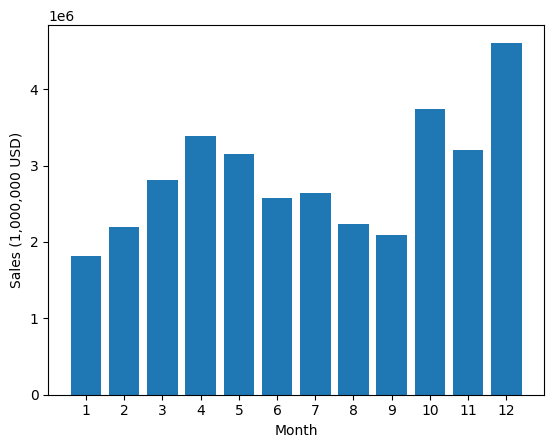

In [243]:
months = range(1, 13)

plt.bar(months, sum_per_month["Sales"])

plt.xticks(months)

plt.xlabel("Month")
plt.ylabel("Sales (1,000,000 USD)")

plt.show()

### By City

In [238]:
sum_per_city = df.groupby("City State").sum()
sum_per_city

<ipython-input-238-c4773f49ad12>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_per_city = df.groupby("City State").sum()


,Quantity Ordered,Price Each,Month,Sales,Order Hour,Order Minute
City State,,,,,,
"Atlanta, GA",16584,2778608.69,104649,2794199.07,214003,442412
"Austin, TX",11137,1808340.03,69720,1818044.33,141688,288674
"Boston, MA",22494,3634398.40,140898,3658627.65,287705,589414
"Dallas, TX",16707,2750026.38,104447,2765373.96,214078,434330
"Los Angeles, CA",33247,5417171.70,208020,5448304.28,426924,865442
"New York City, NY",27903,4632920.54,175557,4661867.14,357214,733011
"Portland, ME",2746,446752.36,17119,449321.38,35152,72743
"Portland, OR",11291,1859836.44,70517,1870010.56,144242,295104
"San Francisco, CA",50169,8204001.38,314949,8254743.55,642269,1317094


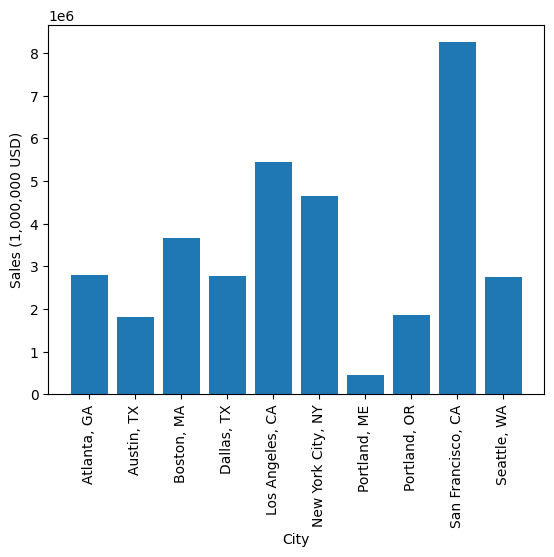

In [242]:
cities = [city for city, df in df.groupby("City State")]

plt.bar(cities, sum_per_city["Sales"])

plt.xticks(cities, rotation=90)

plt.xlabel("City")
plt.ylabel("Sales (1,000,000 USD)")

plt.show()

### By Order Time

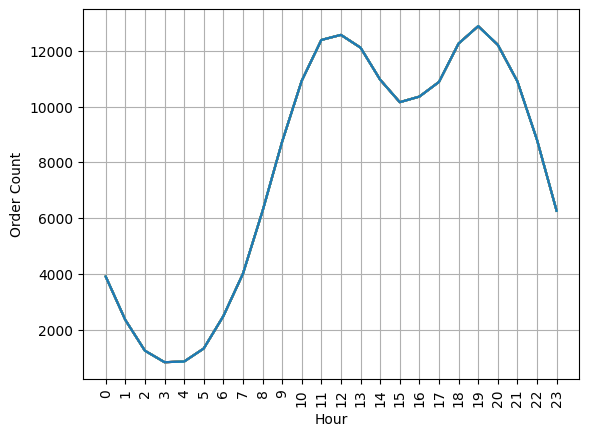

In [219]:
hours = [hour for hour, df in df.groupby("Order Hour")]

plt.plot(hours, df.groupby("Order Hour").count())

plt.xticks(hours, rotation=90)

plt.xlabel("Hour")
plt.ylabel("Order Count")

plt.grid()

plt.show()

### By Product Combination

In [220]:
from itertools import combinations
from collections import Counter

In [221]:
same_order = df[["Order ID", "Group"]].drop_duplicates()
same_order

,Order ID,Group
0,194095,Wired Headphones
1,194096,AA Batteries (4-pack)
2,194097,27in FHD Monitor
3,194098,Wired Headphones
4,194099,AAA Batteries (4-pack)
...,...,...
186845,162004,Apple Airpods Headphones
186846,162005,AAA Batteries (4-pack)
186847,162006,USB-C Charging Cable
186848,162007,USB-C Charging Cable


In [223]:
count = Counter()

for row in df["Group"]:
  row_list = row.split(", ")
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(f"{key[0]} and {key[1]}")

iPhone and Lightning Charging Cable
Google Phone and USB-C Charging Cable
iPhone and Wired Headphones
Google Phone and Wired Headphones
iPhone and Apple Airpods Headphones
Vareebadd Phone and USB-C Charging Cable
Google Phone and Bose SoundSport Headphones
USB-C Charging Cable and Wired Headphones
Vareebadd Phone and Wired Headphones
Lightning Charging Cable and Wired Headphones


### By Product

<ipython-input-240-0bacdc7ac9a3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()["Quantity Ordered"]


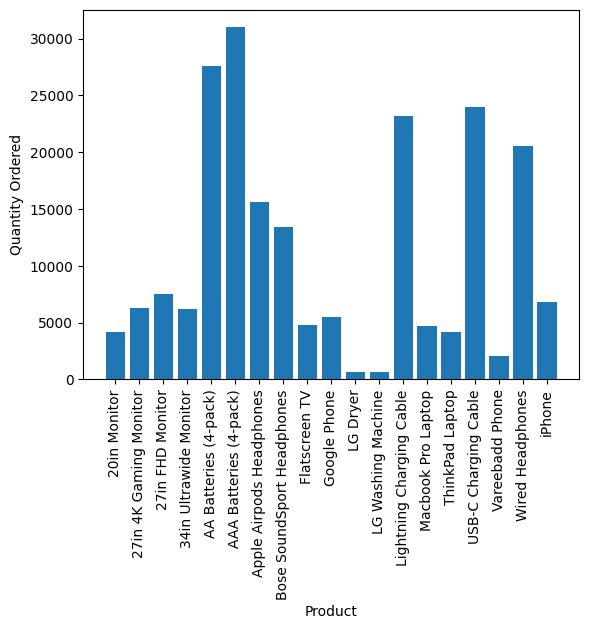

In [240]:
product_group = df.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xlabel("Product")
plt.ylabel("Quantity Ordered")

plt.xticks(rotation=90)

plt.show()

<ipython-input-251-b103026590ce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = df.groupby("Product").mean()["Price Each"]
<ipython-input-251-b103026590ce>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation=90)


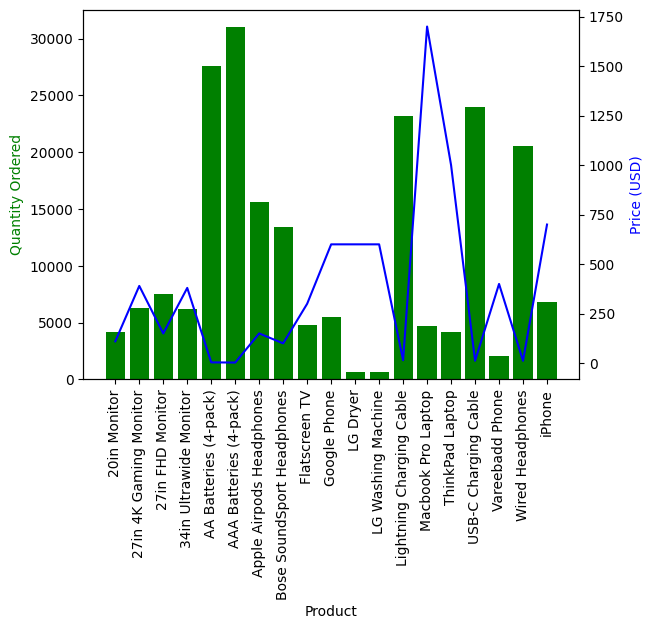

In [251]:
prices = df.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color="g")
ax2.plot(products, prices, "b-")

ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity Ordered", color="g")
ax2.set_ylabel("Price (USD)", color="b")

ax1.set_xticklabels(products, rotation=90)

plt.show()

There is a correlation between how many products are ordered and its price, cheap products tend to sell more.